In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

In [4]:
# Loading Dataset
df = pd.read_excel(r"C:\Users\SAIYONI SHAH\Downloads\diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# EDA
# 1. Missing values
missing_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
print("\nMissing Values Summary:")
print(missing_df)

# 2. Duplicate Rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# 3. Statistical Summary
print("\nStatistical Summary:")
display(df.describe().T)  

# 4. Checking for zero values in numeric columns
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_count = (df[zero_columns] == 0).sum()
print("\nZero Values Before Handling:")
print(zero_count)

# Replace zeros with median values (since medically they represent missing data)
for col in zero_columns:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

# Check again after handling
zero_count_after = (df[zero_columns] == 0).sum()
print("\nZero Values After Handling:")
print(zero_count_after)


Missing Values Summary:
                          Missing Values  Percentage (%)
Pregnancies                            0             0.0
Glucose                                0             0.0
BloodPressure                          0             0.0
SkinThickness                          0             0.0
Insulin                                0             0.0
BMI                                    0             0.0
DiabetesPedigreeFunction               0             0.0
Age                                    0             0.0
Outcome                                0             0.0

Duplicate Rows: 0

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



Zero Values Before Handling:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Zero Values After Handling:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


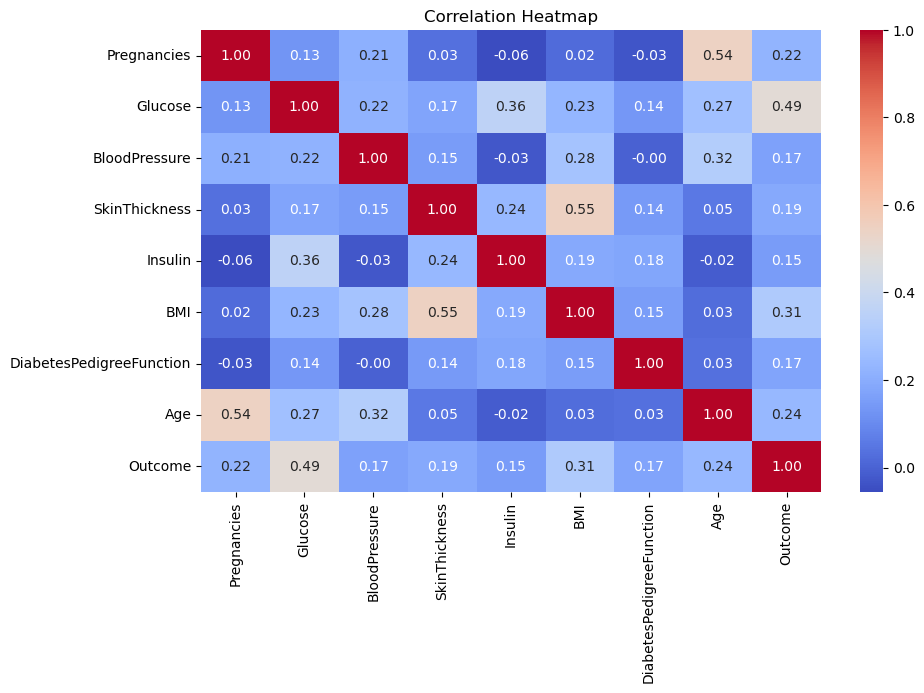

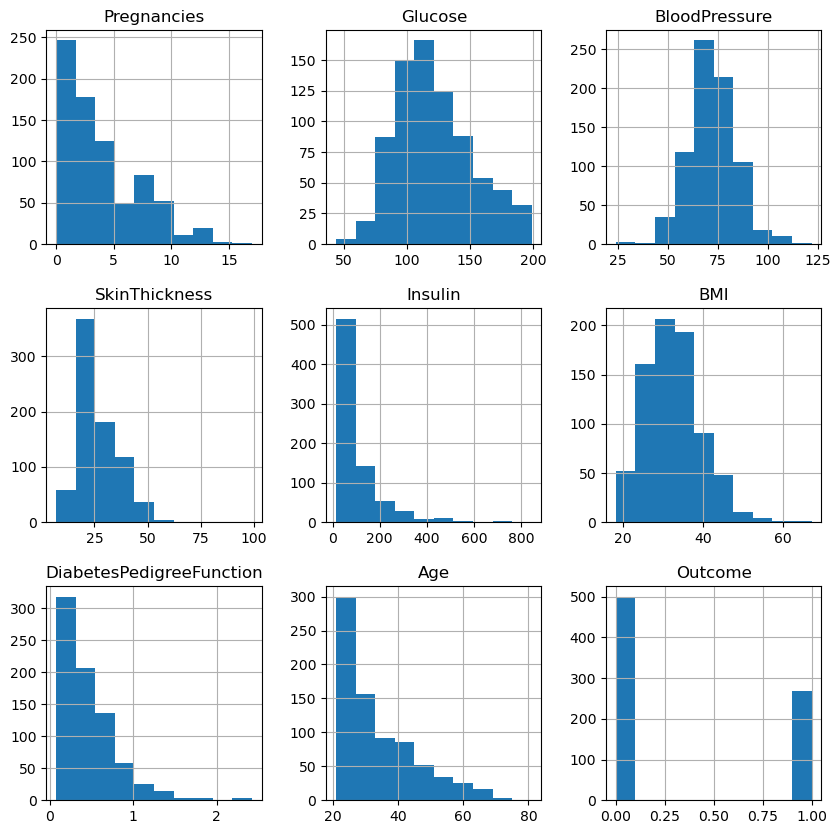

In [8]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
df.hist(figsize=(10,10))
plt.show()

In [9]:
# Data Preprocessing
df.fillna(df.mean(), inplace=True)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [10]:
#Data model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Testing
y_pred = model.predict(X_test)

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


In [13]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6666666666666666


In [14]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.6909090909090909


In [15]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6785714285714286


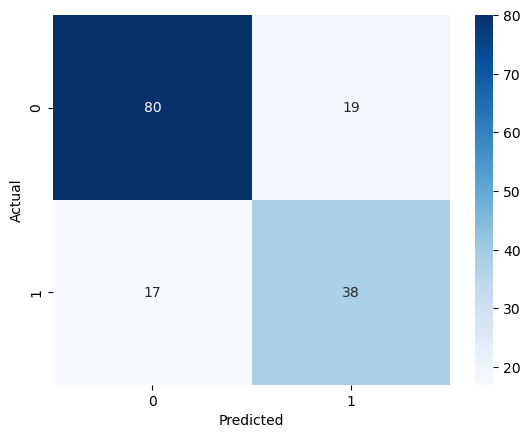

In [16]:
# Comparison Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()